In [1]:
import sys, tweepy, csv, re
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        
        consumerKey = ''
        consumerSecret = ''
        accessToken = ''
        accessTokenSecret = ''
        
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)


        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))


        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)


        csvFile = open('result.csv', 'a')
        csvWriter = csv.writer(csvFile)
        

        polarity, snegative, negative, wnegative, neutral, wpositive, positive, spositive = (0,)*8


        for tweet in self.tweets:

            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))

            analysis = TextBlob(tweet.text)

            polarity += analysis.sentiment.polarity

            if (analysis.sentiment.polarity == 0):
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1
            else:
                neutral = 0



        csvWriter.writerow(self.tweetText)
        csvFile.close()


        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)


        polarity = polarity / NoOfTerms
        
        # df = pd.read_csv('result.csv')
        # print("here are 10 tweets this program just collected: ")
        # df.head(10)


        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity==0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weak Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strong Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weak Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strong Negative")

        print('\ndetailed report: ')
        print(str(snegative), "% had a strong negative opinion about ", searchTerm)
        print(str(negative), "% had a negative opinion about ", searchTerm)
        print(str(wnegative), "% had a weak negative opinion about ", searchTerm)
        print(str(neutral), "% had a neutral opinion about ", searchTerm)
        print(str(wpositive), "% had a weak positive opinion about ", searchTerm)
        print(str(positive), "% had a positive opinion about ", searchTerm)
        print(str(spositive), "% had a strong positive opinion about ", searchTerm)

        self.plotPieChart(snegative, negative, wnegative, neutral, wpositive, positive, spositive, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):

        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())


    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, snegative, negative, wnegative, neutral, wpositive, positive, spositive, searchTerm, NoOfTerms):
            labels = ['strong negative [' + str(snegative) + '%]',
                     'negative [' + str(negative) + '%]',
                     'weak negative [' + str(wnegative) + '%]',
                     'neutral [' + str(neutral) + '%]',
                     'weak positive [' + str(wpositive) + '%]',
                     'positive [' + str(positive) + '%]',
                     'strong positive [' + str(spositive) + '%]'
                     ]
            sizes = [snegative, negative, wnegative, neutral, wpositive, positive, spositive]
            colors = ['red', 'darkorange', 'yellow', 'limegreen', 'aquamarine', 'mediumblue', 'darkviolet']
            patches, texts = plt.pie(sizes, colors=colors, startangle=90)
            plt.legend(patches, labels, loc='upper right')
            plt.title('reactions in a rainbow pie chart 🌈')
            plt.axis('equal')
            plt.tight_layout
            plt.show()

Enter Keyword/Tag to search about: Corona Virus
Enter how many tweets to search: 500
How people are reacting on Corona Virus by analyzing 500 tweets.

General Report: 
Weak Negative

detailed report: 
4.60 % had a strong negative opinion about  Corona Virus
6.80 % had a negative opinion about  Corona Virus
11.40 % had a weak negative opinion about  Corona Virus
2.60 % had a neutral opinion about  Corona Virus
13.80 % had a weak positive opinion about  Corona Virus
7.20 % had a positive opinion about  Corona Virus
1.80 % had a strong positive opinion about  Corona Virus


/home/wtf_minseok/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/wtf_minseok/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0, flags=flags)


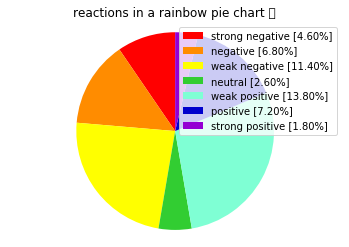

In [3]:
if __name__== "__main__":
    sentimentAnalysis = SentimentAnalysis()
    sentimentAnalysis.DownloadData()

Enter Keyword/Tag to search about: EXO
Enter how many tweets to search: 1000
How people are reacting on EXO by analyzing 1000 tweets.

General Report: 
Weak Positive

detailed report: 
0.80 % had a strong negative opinion about  EXO
1.10 % had a negative opinion about  EXO
16.30 % had a weak negative opinion about  EXO
52.10 % had a neutral opinion about  EXO
12.80 % had a weak positive opinion about  EXO
14.80 % had a positive opinion about  EXO
2.10 % had a strong positive opinion about  EXO


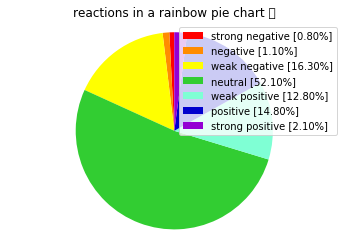

In [4]:
if __name__== "__main__":
    sentimentAnalysis = SentimentAnalysis()
    sentimentAnalysis.DownloadData()